In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## About Dataset
### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Content Attribute Information:

##### age
##### sex
##### chest pain type (4 values)
##### resting blood pressure
##### serum cholestoral in mg/dl
##### fasting blood sugar > 120 mg/dl
##### resting electrocardiographic results (values 0,1,2)
##### maximum heart rate achieved
##### exercise induced angina
##### oldpeak = ST depression induced by exercise relative to rest
##### the slope of the peak exercise ST segment
##### number of major vessels (0-3) colored by flourosopy
##### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
##### The names and social security numbers of the patients were
##### recently removed from the database, replaced with dummy values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Projetos-ML/Prevent_Heart_Desease/heart.csv')
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

723

### Existem 723 linhas duplicadas isso pode afetar o peso das nossas caracteristicas, precisam ser retiradas...


In [8]:
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Vamos ver a correlação entre as caracteristicas e a coluna target

<Axes: >

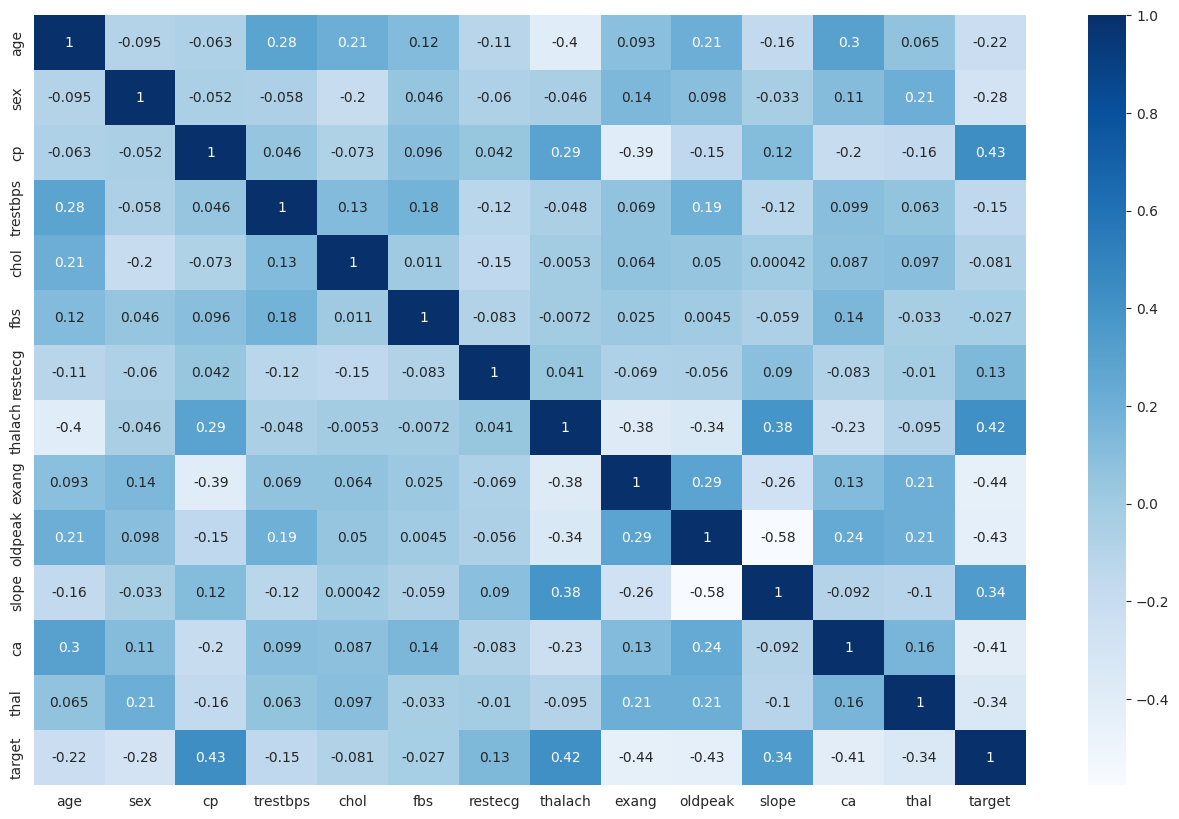

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [11]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [12]:
# Separar variaveis categoricas e numericas
for c in df.columns:
  print(f"{c}: {df[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [13]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

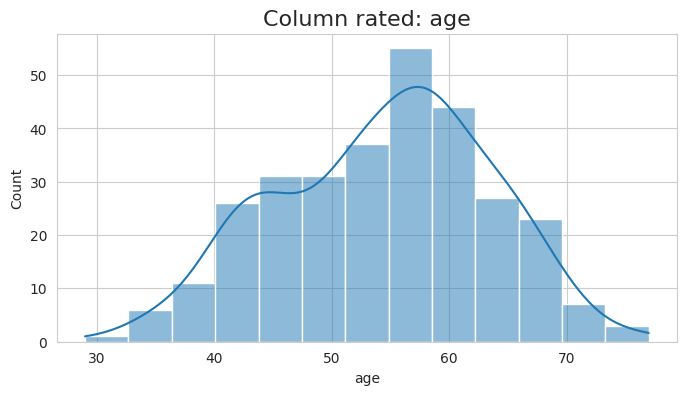

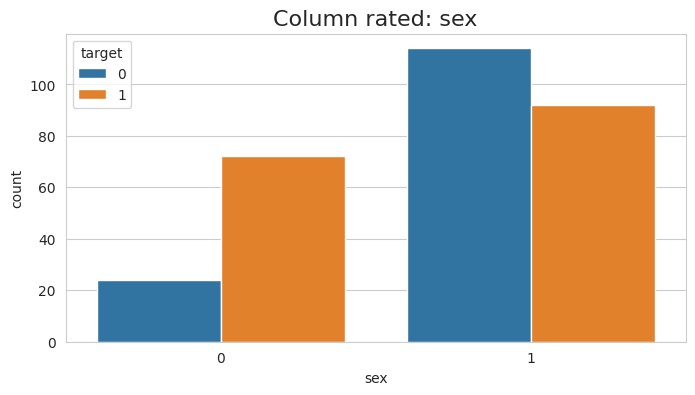

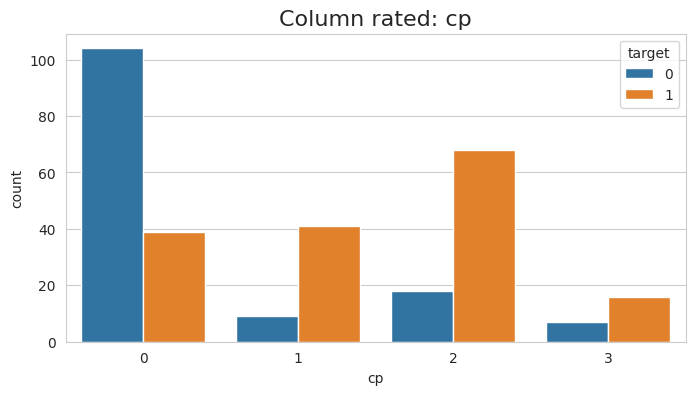

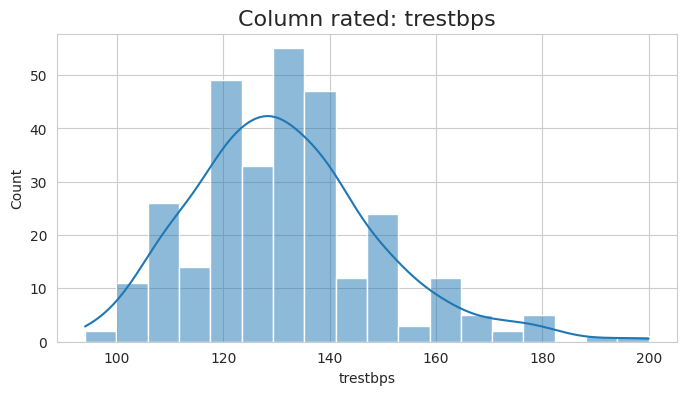

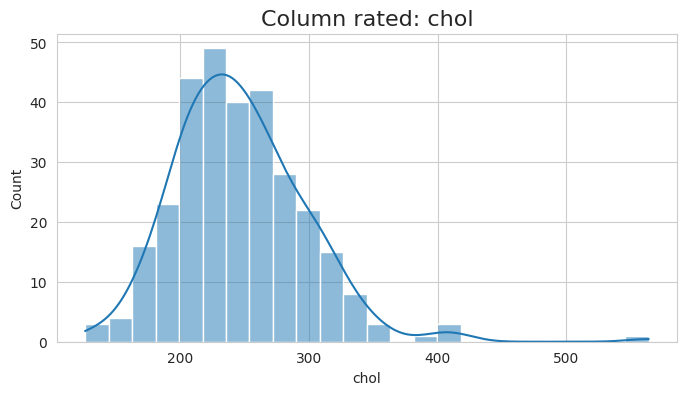

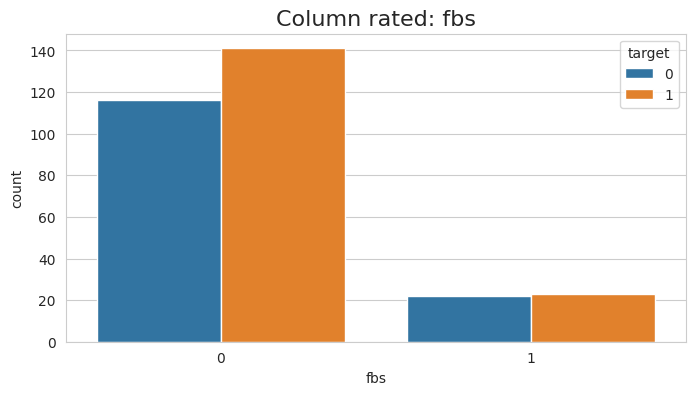

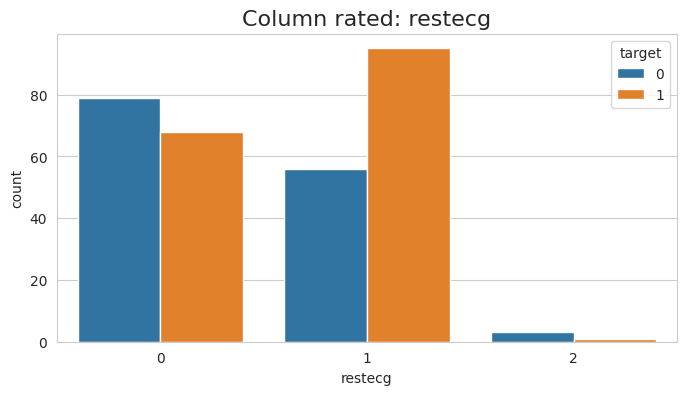

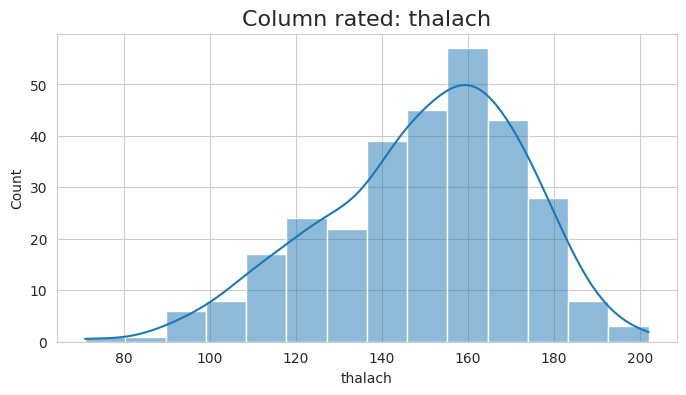

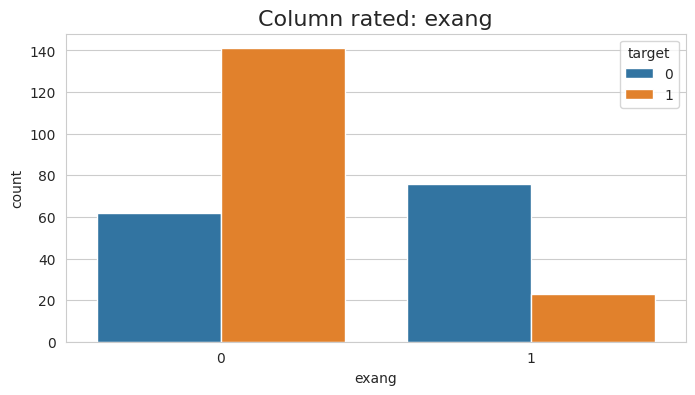

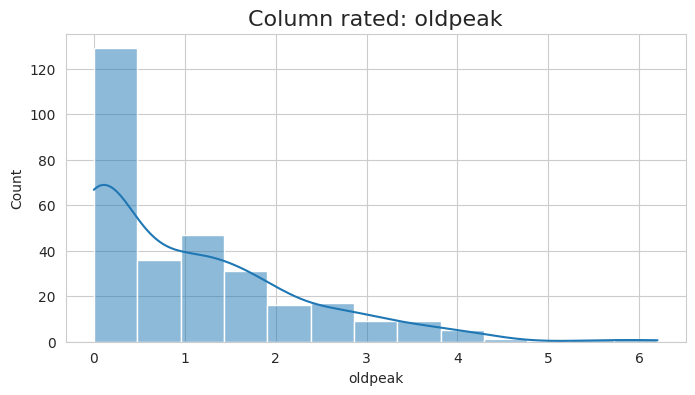

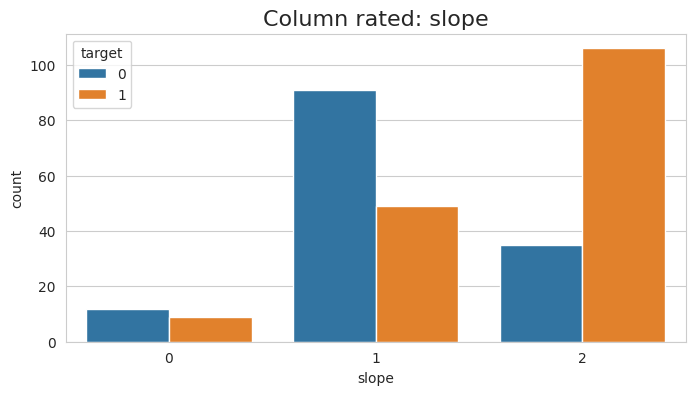

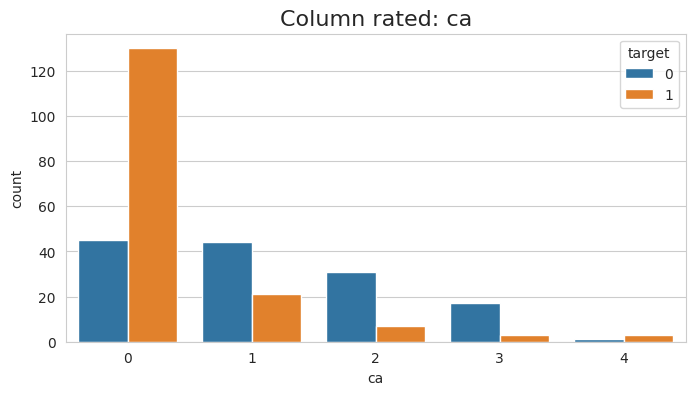

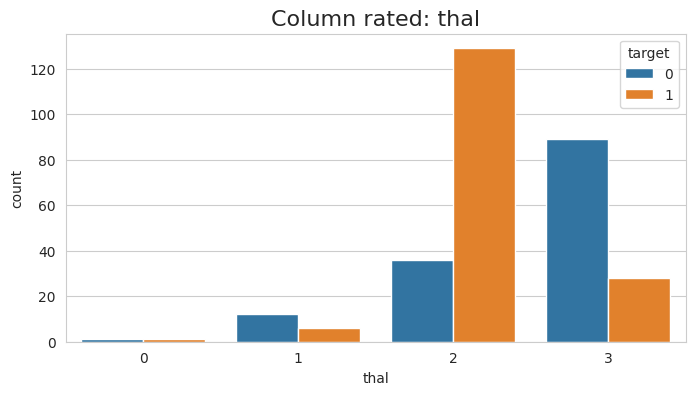

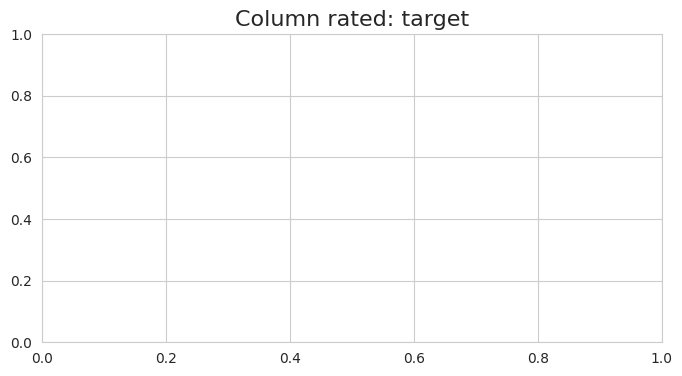

In [14]:
for c in df.columns:
  plt.figure(figsize = (8, 4))
  plt.title(f'Column rated: {c}', fontsize = 16)
  if c in categoricas:
    sns.countplot(x = df[c], hue = df['target'])
  if c in numericas:
    sns.histplot(df[c], kde = True)

## Removendo Outliers

<Axes: >

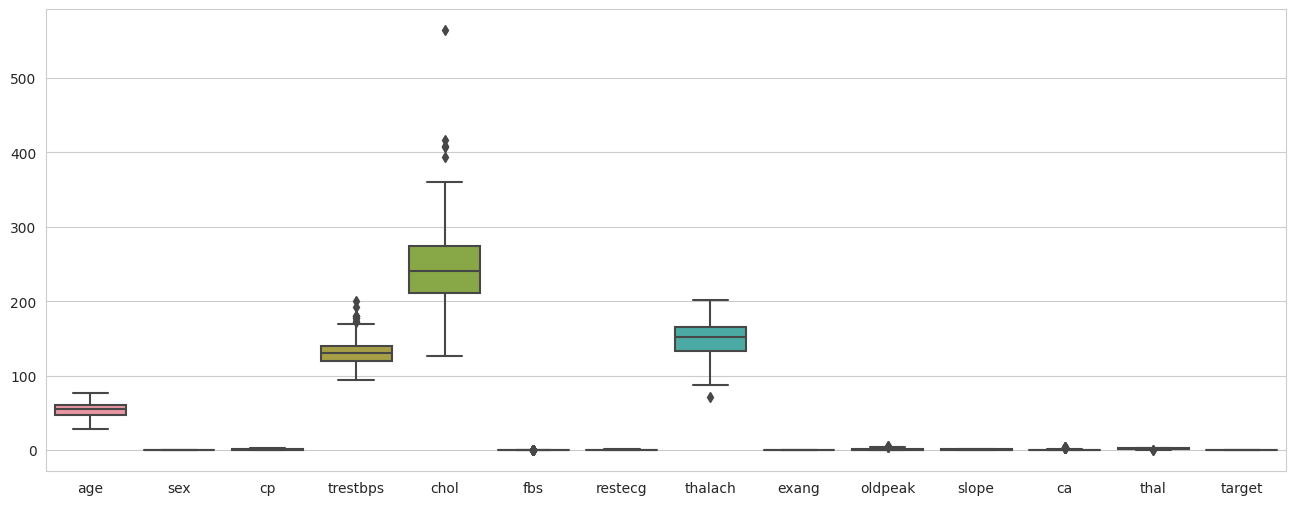

In [15]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df)

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df['trestbps'].quantile(0.99)

180.0

In [18]:
df = df[df['trestbps'] < df['trestbps'].quantile(0.99)]
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

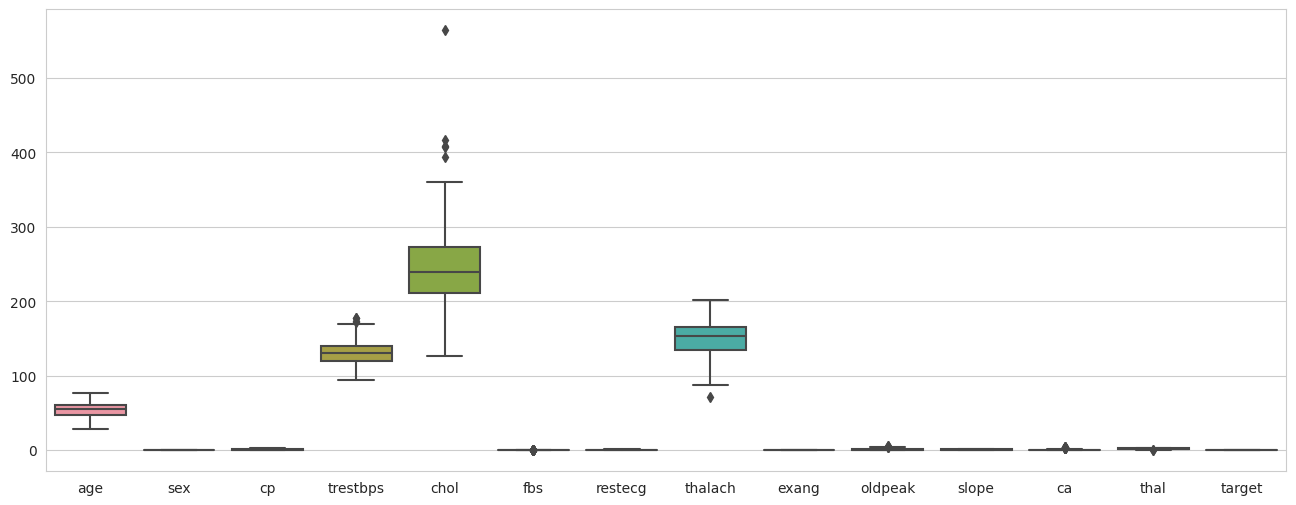

In [19]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df)

In [20]:
df['chol'].quantile(0.985)

379.0400000000001

In [21]:
df = df[df['chol'] < df['chol'].quantile(0.985)]
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,54.195205,0.698630,0.972603,130.592466,242.311644,0.143836,0.534247,149.462329,0.321918,1.015411,1.404110,0.712329,2.304795,0.547945
std,9.070907,0.459641,1.035090,16.207260,44.676410,0.351525,0.519905,23.022071,0.468014,1.141472,0.615703,1.004860,0.614468,0.498550
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.750000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

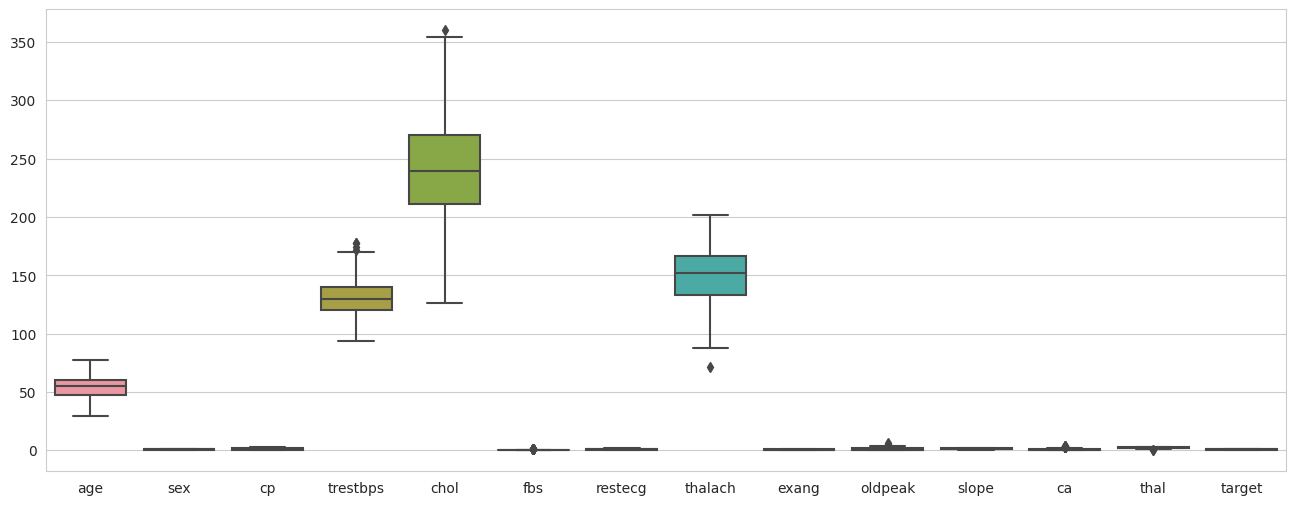

In [22]:
plt.figure(figsize = (16, 6))
sns.boxplot(data=df)

In [23]:
df['thalach'].quantile(0.001)

75.947

In [24]:
df = df[df['thalach'] > df['thalach'].quantile(0.001)]
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.151203,0.697595,0.975945,130.628866,242.329897,0.144330,0.532646,149.731959,0.323024,1.015464,1.405498,0.714777,2.305842,0.549828
std,9.055261,0.460091,1.035294,16.223219,44.752281,0.352029,0.520079,22.595170,0.468437,1.143438,0.616305,1.005719,0.615266,0.498368
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

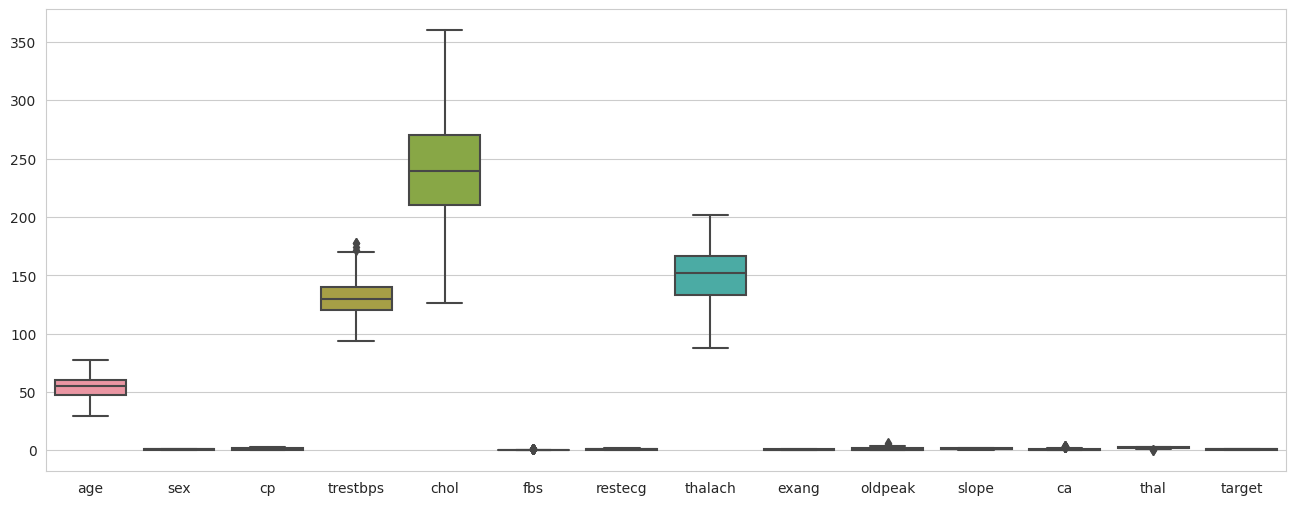

In [25]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)

In [26]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
df = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Slicing train data and test data


In [29]:
X = df.drop('target', axis=1)
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
331,63,108,269,169,1.8,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
349,62,130,263,97,1.2,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
342,65,155,269,148,0.8,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
81,49,118,149,126,0.8,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
26,44,130,233,179,0.4,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,35,122,192,174,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
78,52,134,201,158,0.8,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
128,52,138,223,169,0.0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
582,55,130,262,155,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [32]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
98,65,110,248,158,0.6,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
522,67,152,277,172,0.0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
49,60,117,230,160,1.4,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
256,35,138,183,182,1.4,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
189,64,125,309,131,1.8,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
160,77,125,304,162,0.0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
366,58,112,230,165,2.5,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
147,41,110,172,158,0.0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,54,122,286,116,3.2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
105,47,110,275,118,1.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


## Logistic Regression



In [33]:
log = LogisticRegression(max_iter=1000)

In [34]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
log.score(X_train, y_train)

0.8793103448275862

In [36]:
log.score(X_test, y_test)

0.847457627118644

In [37]:
#####
y_previsto = log.predict(X_test)

In [38]:
accuracy_score(y_test, y_previsto)

0.847457627118644

In [39]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59



In [40]:
confusion_matrix(y_test, y_previsto)

array([[24,  7],
       [ 2, 26]])

## Criando função para prever com diferentes algoritmos


In [41]:
def relatorio_ml(df, algoritmo, opt = 2):
  X = df.drop('target', axis=1)
  y = df['target']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acuracia treino: {score_train * 100:.2f}%')
  score_test = ml.score(X_test, y_test)
  print(f'Acuracia test: {score_test * 100:.2f}%')

  y_previsto = log.predict(X_test)
  print('--- CLASSIFICATION REPORT ---')
  print(classification_report(y_test, y_previsto))
  print('--- CLASSIFICATION REPORT ---')
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot = True, cmap = 'Blues')

  return score_train, score_test

Acuracia treino: 87.93%
Acuracia test: 84.75%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59

--- CLASSIFICATION REPORT ---


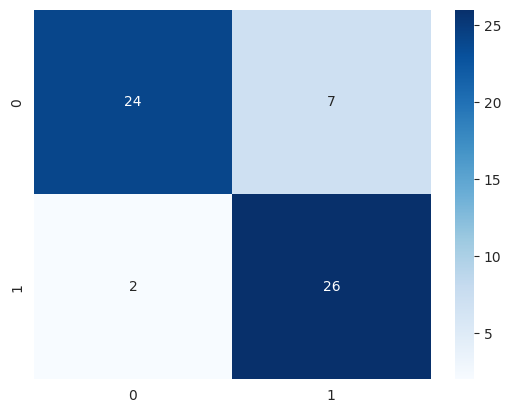

In [42]:
log_train, log_test = relatorio_ml(df, LogisticRegression, opt = 0)

Acuracia treino: 100.00%
Acuracia test: 69.49%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59

--- CLASSIFICATION REPORT ---


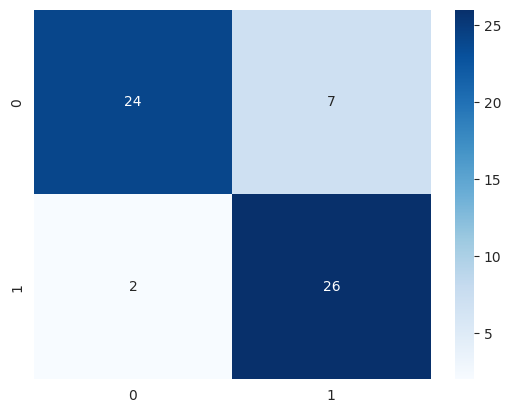

In [43]:
tree_train, tree_test = relatorio_ml(df, DecisionTreeClassifier)

Acuracia treino: 94.83%
Acuracia test: 79.66%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59

--- CLASSIFICATION REPORT ---


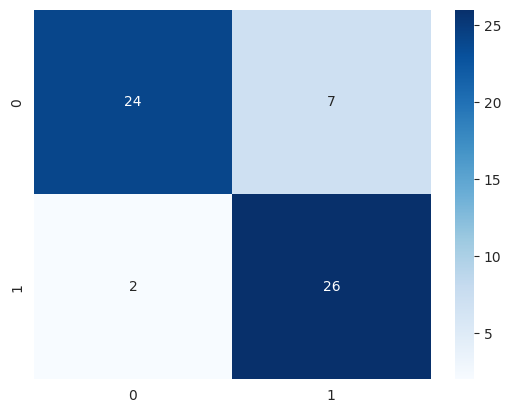

In [44]:
ada_train, ada_test = relatorio_ml(df, AdaBoostClassifier)

Acuracia treino: 78.02%
Acuracia test: 59.32%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59

--- CLASSIFICATION REPORT ---


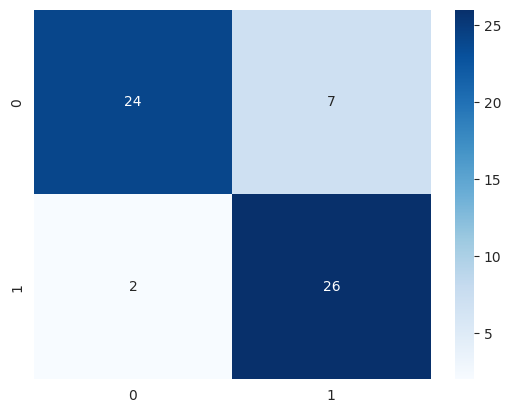

In [45]:
kn_train, kn_test = relatorio_ml(df, KNeighborsClassifier)

Acuracia treino: 100.00%
Acuracia test: 84.75%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.79      0.93      0.85        28

    accuracy                           0.85        59
   macro avg       0.86      0.85      0.85        59
weighted avg       0.86      0.85      0.85        59

--- CLASSIFICATION REPORT ---


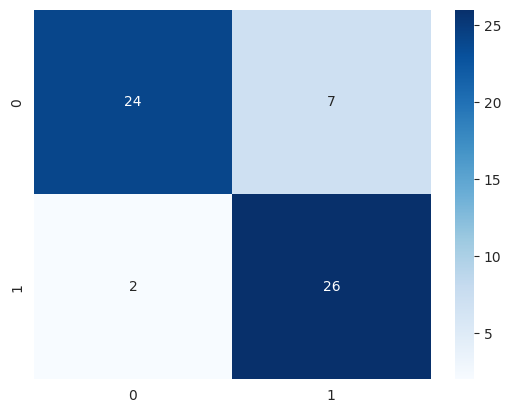

In [46]:
rand_train, rand_test = relatorio_ml(df, RandomForestClassifier)